# **Assessing the Factors Influencing Airbnb Rental Prices in Europe: A Multiple Linear Regression Analysis**
---

Yusril Sabilla Ashar - Statistic of Business

### Import Package

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statistics import mode

###Import Dataset

In [301]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [302]:
import os
import glob
# Path to the folder containing the CSV files
folder_path = "/content/drive/My Drive/AirBnB/AirBnB"

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Load all CSV files into a list of dataframes and add "City" and "Day Type" columns
dfs = []
for file in csv_files:
    # Get the city and day type from the file name
    file_name = os.path.basename(file)
    city, day_type = file_name.split("_")
    
    # Load the CSV file into a dataframe and add the "City" and "Day Type" columns
    df = pd.read_csv(file)
    df["City"] = city
    df["Day Type"] = day_type.split(".")[0]
    dfs.append(df)

# Concatenate all dataframes into one
df = pd.concat(dfs, ignore_index=True)

# Print the combined dataframe
print(df)

       Unnamed: 0     realSum        room_type  room_shared  room_private  \
0               0  185.799757     Private room        False          True   
1               1  387.491820  Entire home/apt        False         False   
2               2  194.914462     Private room        False          True   
3               3  171.777134     Private room        False          True   
4               4  207.768533     Private room        False          True   
...           ...         ...              ...          ...           ...   
51702        1733  219.012224  Entire home/apt        False         False   
51703        1734  191.197438  Entire home/apt        False         False   
51704        1735  251.501765  Entire home/apt        False         False   
51705        1736  637.636444  Entire home/apt        False         False   
51706        1737  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  

### Check and Cleaning Data

In [303]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Day Type
0,0,185.799757,Private room,False,True,2.0,True,0,0,10.0,...,3.582222,0.174708,105.063613,16.013858,148.940768,31.511339,13.42344,52.49150,berlin,weekends
1,1,387.491820,Entire home/apt,False,False,6.0,False,0,1,10.0,...,6.082132,0.480956,52.877461,8.059614,66.884920,14.150816,13.50300,52.50900,berlin,weekends
2,2,194.914462,Private room,False,True,5.0,False,0,1,9.0,...,3.525398,0.511928,75.339762,11.483331,106.443168,22.520139,13.46800,52.51900,berlin,weekends
3,3,171.777134,Private room,False,True,2.0,False,0,0,9.0,...,3.801739,0.281385,73.668908,11.228659,105.438990,22.307685,13.47096,52.51527,berlin,weekends
4,4,207.768533,Private room,False,True,3.0,True,0,0,10.0,...,0.982405,0.705579,133.187395,20.300502,198.233241,41.940128,13.42281,52.53139,berlin,weekends


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [305]:
df.shape

(51707, 22)

In [306]:
#drop columns
df = df.drop('Unnamed: 0', axis = 1)
df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'Day Type'],
      dtype='object')

In [307]:
#describe df
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [308]:
#Check NA
df.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
City                          0
Day Type                      0
dtype: int64

In [309]:
#Check duplicated
df[df.duplicated()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Day Type


In [310]:
#Validation Checking
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [311]:
#Validation Checking
df['City'].unique()

array(['berlin', 'london', 'barcelona', 'athens', 'lisbon', 'budapest',
       'amsterdam', 'rome', 'paris', 'vienna'], dtype=object)

In [312]:
#Validation Checking
df['Day Type'].unique()

array(['weekends', 'weekdays'], dtype=object)

Outlier

<ipython-input-313-a11b52850a93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.realSum)


<Axes: xlabel='realSum', ylabel='Density'>

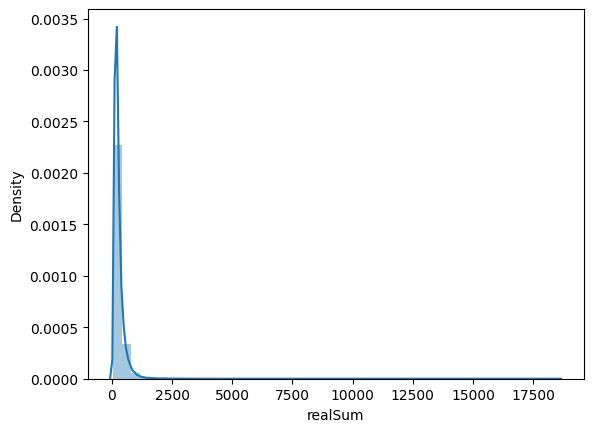

In [313]:
sns.distplot(df.realSum)

<Axes: xlabel='realSum', ylabel='Count'>

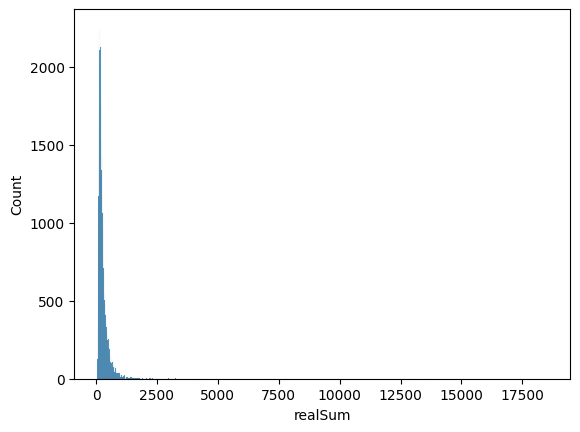

In [314]:
sns.histplot(df.realSum)

<Axes: xlabel='City', ylabel='realSum'>

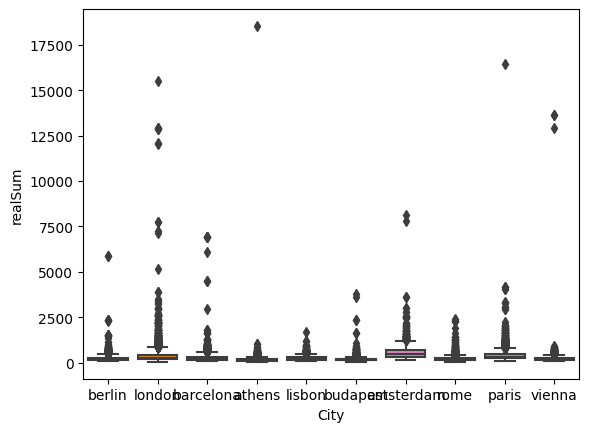

In [315]:
sns.boxplot(x = 'City', y = 'realSum', data = df)

In [316]:
# Find Q1 & Q3 because realSum indicated has outlier
Q1 = df.realSum.quantile(0.25)
Q3 = df.realSum.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 148.75
Q3 : 319.69


In [317]:
# Find IQR and Maximum Boundary
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 170.94
Maximum Boundary : 576.11


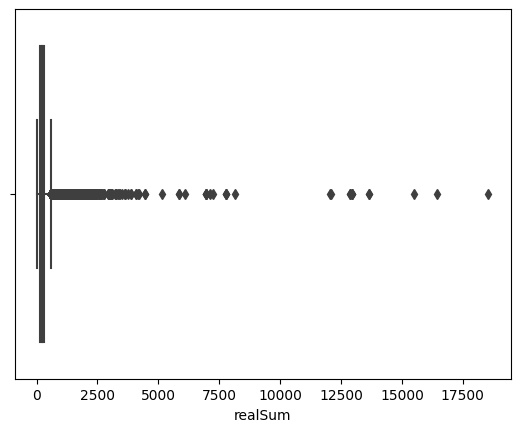

In [318]:
sns.boxplot(x = df.realSum)
plt.show()

In [319]:
# Filter without outlier and adding data
df_1 = df[df["realSum"] < max_bound + 423.89]

<Axes: xlabel='realSum', ylabel='Count'>

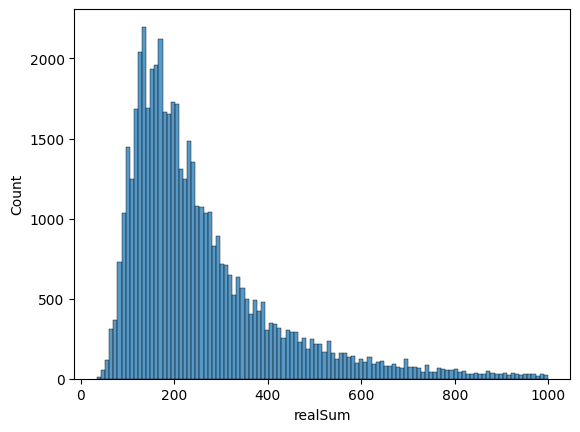

In [320]:
sns.histplot(df_1.realSum)

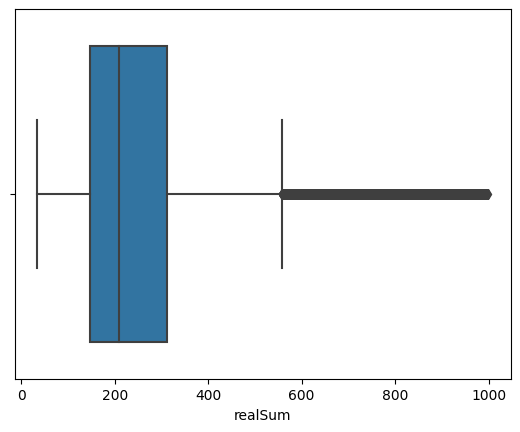

In [321]:
sns.boxplot(x = df_1.realSum)
plt.show()

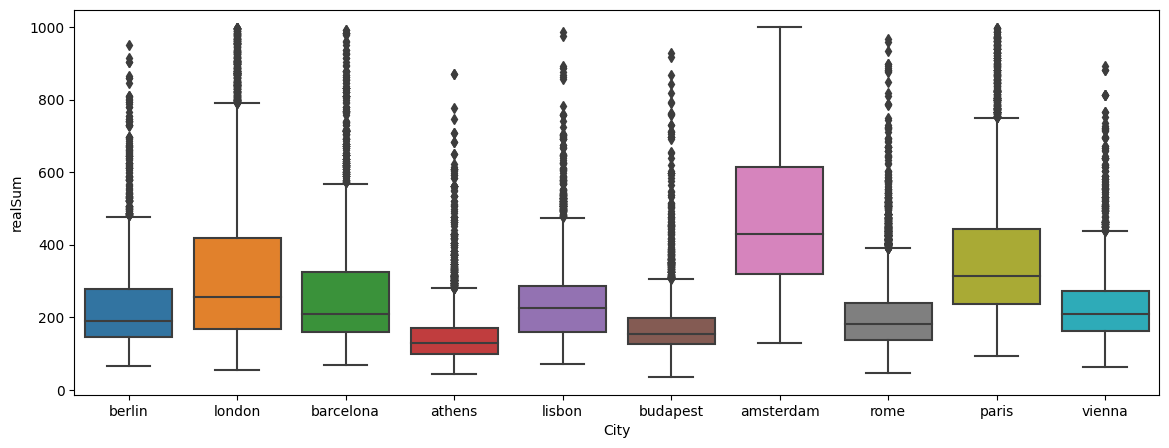

In [322]:
plt.figure(figsize=(14,5))
sns.boxplot(x = 'City',
            y = 'realSum',
            data = df_1)
plt.show()

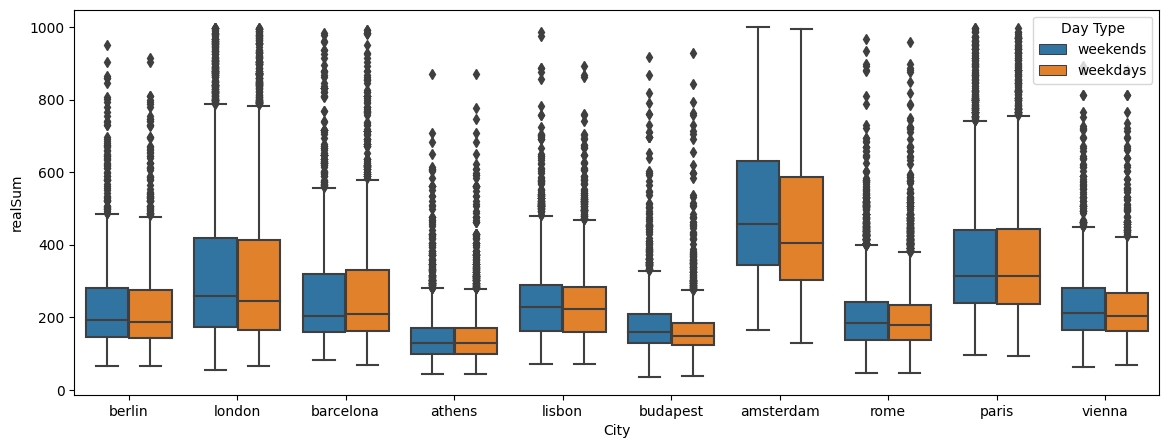

In [323]:
plt.figure(figsize=(14,5))
sns.boxplot(x='City',y='realSum',data=df_1,hue='Day Type')
plt.show()

In [324]:
df_1.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Day Type
0,185.799757,Private room,False,True,2.0,True,0,0,10.0,98.0,...,3.582222,0.174708,105.063613,16.013858,148.940768,31.511339,13.42344,52.49150,berlin,weekends
1,387.491820,Entire home/apt,False,False,6.0,False,0,1,10.0,93.0,...,6.082132,0.480956,52.877461,8.059614,66.884920,14.150816,13.50300,52.50900,berlin,weekends
2,194.914462,Private room,False,True,5.0,False,0,1,9.0,86.0,...,3.525398,0.511928,75.339762,11.483331,106.443168,22.520139,13.46800,52.51900,berlin,weekends
3,171.777134,Private room,False,True,2.0,False,0,0,9.0,91.0,...,3.801739,0.281385,73.668908,11.228659,105.438990,22.307685,13.47096,52.51527,berlin,weekends
4,207.768533,Private room,False,True,3.0,True,0,0,10.0,97.0,...,0.982405,0.705579,133.187395,20.300502,198.233241,41.940128,13.42281,52.53139,berlin,weekends


In [325]:
#Drop columns again
cols2drop = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'room_shared', 'room_private', 'lng', 'lat']
df_1 = df.drop(cols2drop, axis=1)
print(df.shape)
df_1.head()

(51707, 21)


,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,City,Day Type
0,185.799757,Private room,2.0,True,0,0,10.0,98.0,1,3.582222,0.174708,berlin,weekends
1,387.491820,Entire home/apt,6.0,False,0,1,10.0,93.0,2,6.082132,0.480956,berlin,weekends
2,194.914462,Private room,5.0,False,0,1,9.0,86.0,1,3.525398,0.511928,berlin,weekends
3,171.777134,Private room,2.0,False,0,0,9.0,91.0,1,3.801739,0.281385,berlin,weekends
4,207.768533,Private room,3.0,True,0,0,10.0,97.0,1,0.982405,0.705579,berlin,weekends


Transformation data

In [326]:
# make dummy variable for room_type
dummy = pd.get_dummies(df_1['room_type'], prefix='room_type')
df_1 = pd.concat([df_1, dummy], axis=1)
df_1.head()

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,City,Day Type,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,185.799757,Private room,2.0,True,0,0,10.0,98.0,1,3.582222,0.174708,berlin,weekends,0,1,0
1,387.491820,Entire home/apt,6.0,False,0,1,10.0,93.0,2,6.082132,0.480956,berlin,weekends,1,0,0
2,194.914462,Private room,5.0,False,0,1,9.0,86.0,1,3.525398,0.511928,berlin,weekends,0,1,0
3,171.777134,Private room,2.0,False,0,0,9.0,91.0,1,3.801739,0.281385,berlin,weekends,0,1,0
4,207.768533,Private room,3.0,True,0,0,10.0,97.0,1,0.982405,0.705579,berlin,weekends,0,1,0


In [327]:
df_1['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [328]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the Default variable
df_1["Day Type"] = LabelEncoder().fit_transform(df_1["Day Type"])
df_1['Day Type'].head()

0    1
1    1
2    1
3    1
4    1
Name: Day Type, dtype: int64

In [329]:
df_1['host_is_superhost'] = LabelEncoder().fit_transform(df_1['host_is_superhost'])
df_1['host_is_superhost'].head()

0    1
1    0
2    0
3    0
4    1
Name: host_is_superhost, dtype: int64

In [330]:
df_1.columns

Index(['realSum', 'room_type', 'person_capacity', 'host_is_superhost', 'multi',
       'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
       'dist', 'metro_dist', 'City', 'Day Type', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [331]:
df_2 = df_1.rename(columns={'Day Type': 'day_type', 'room_type_Entire home/apt': 'entire_home_apt', 'room_type_Private room': 'private_room', 'room_type_Shared room': 'shared_room'})

In [332]:
df_2.head()

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,City,day_type,entire_home_apt,private_room,shared_room
0,185.799757,Private room,2.0,1,0,0,10.0,98.0,1,3.582222,0.174708,berlin,1,0,1,0
1,387.491820,Entire home/apt,6.0,0,0,1,10.0,93.0,2,6.082132,0.480956,berlin,1,1,0,0
2,194.914462,Private room,5.0,0,0,1,9.0,86.0,1,3.525398,0.511928,berlin,1,0,1,0
3,171.777134,Private room,2.0,0,0,0,9.0,91.0,1,3.801739,0.281385,berlin,1,0,1,0
4,207.768533,Private room,3.0,1,0,0,10.0,97.0,1,0.982405,0.705579,berlin,1,0,1,0


In [333]:
df_2 = df_2.drop(columns=['City', 'room_type'])

In [334]:
df_2['multi'].unique()

array([0, 1])

Correlation between variable

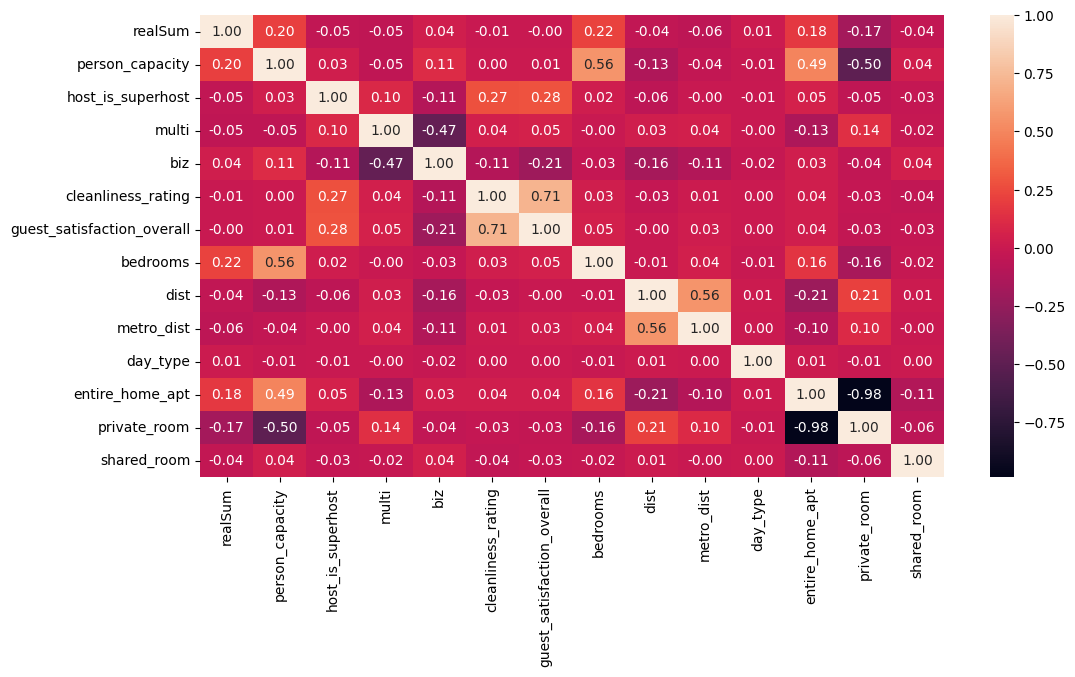

In [335]:
plt.figure(figsize=(12,6))
sns.heatmap(df_2.corr(),annot=True,fmt='.2f')
plt.show()

## Analyze using OLS

In [336]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [337]:
df_2.columns

Index(['realSum', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'day_type', 'entire_home_apt', 'private_room',
       'shared_room'],
      dtype='object')

In [338]:
# modelling
import statsmodels.formula.api as smf

# statistics 
import scipy.stats as stats

In [339]:
# Create OLS model object
model = smf.ols("realSum ~ person_capacity + host_is_superhost + multi + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + day_type+ private_room + entire_home_apt + shared_room", df_2)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_c_height = print_coef_std_err(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     369.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:31:37   Log-Likelihood:            -3.7077e+05
No. Observations:               51707   AIC:                         7.416e+05
Df Residuals:                   51694   BIC:                         7.417e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Because cleanliness_rating dan guest_satisfaction_overall is not significant in 0.05, so i replaced it

In [340]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant columns
df_2 = df_2[['realSum', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'bedrooms', 'dist', 'metro_dist', 'day_type', 'entire_home_apt', 'private_room', 'shared_room']]

# Create OLS model object
model = smf.ols("realSum ~ person_capacity + host_is_superhost + multi + biz + bedrooms + dist + metro_dist + day_type + entire_home_apt + private_room + shared_room", df_2)

# Fit the model
results = model.fit()

print("OLS Regression Results:")
print(results.summary())

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     442.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:31:37   Log-Likelihood:            -3.7077e+05
No. Observations:               51707   AIC:                         7.416e+05
Df Residuals:                   51696   BIC:                         7.417e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept     

* intercept coefficient is 71.6835, meaning that if all independent variables are set to 0, the predicted value of realSum is 71.6835.
* person_capacity has a coefficient of 9.7015, indicating that if there is an increase of one unit in the person_capacity variable, the value of realSum will increase by 9.7015 units, assuming all other independent variables remain constant.
* host_is_superhost has a coefficient of -40.0667, indicating that if there is a change in the host_is_superhost variable from 0 to 1 (from non-superhost to superhost), the value of realSum will decrease by 40.0667 units, assuming all other independent variables remain constant.
* multi has a coefficient of -13.6137, indicating that if there is a change in the multi variable from 0 to 1, the value of realSum will decrease by 13.6137 units, assuming all other independent variables remain constant.
* biz has a coefficient of 11.9253, indicating that if there is a change in the biz variable from 0 to 1, the value of realSum will increase by 11.9253 units, assuming all other independent variables remain constant.
* bedrooms variable has a coefficient of 96.5920, indicating that if there is an increase of one unit in the bedrooms variable, the value of realSum will increase by 96.5920 units, assuming all other independent variables remain constant.
* dist has a coefficient of 3.6295, indicating that if there is an increase of one unit in the dist variable, the value of realSum will increase by 3.6295 units, assuming all other independent variables remain constant.
* metro_dist has a coefficient of -25.7342, indicating that if there is an increase of one unit in the metro_dist variable, the value of realSum will decrease by 25.7342 units, assuming all other independent variables remain constant.
* day_type has a coefficient of 8.9192, indicating that if there is a change in the day_type variable from weekday to weekend, the value of realSum will increase by 8.9192 units, assuming all other independent variables remain constant.
* entire_home_apt has a coefficient of 109.0599, indicating that if there is a change in the entire_home_apt variable from 0 to 1, the value of realSum will increase by 109.0599 units, assuming all other independent variables remain constant.
* private_room has a coefficient of 23.9219, indicating that if there is a change in the private_room variable from 0 to 1, the value of realSum will increase by 23.9219 units, assuming all other independent variables remain constant.
* shared room has a coefficient of -61.29, indicating that if there is a change in the private_room variable from 0 to 1, the value of realSum will increase by -61.29 units, assuming all other independent variables remain constant.

In [341]:
# Checking Multicorrelation
X = sm.add_constant(df_2.drop(columns=['realSum']))
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

print("\nVIF:")
print(vif)

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



VIF:
            variables       VIF
9     entire_home_apt       inf
10       private_room       inf
11        shared_room       inf
1     person_capacity  2.018217
6                dist  1.550270
5            bedrooms  1.532150
7          metro_dist  1.460686
4                 biz  1.378411
3               multi  1.331793
2   host_is_superhost  1.024449
8            day_type  1.001045
0               const  0.000000


In [342]:
#Checking R2 and RMSE
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = results.predict(df_2)
rmse = np.sqrt(mean_squared_error(df_2["realSum"], y_pred))

# Calculate R2
r2 = r2_score(df_2["realSum"], y_pred)

# Print
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 314.74218448394095
R-squared: 0.07889887594988876


## Conclusion

On the other hand, being a superhost has a negative impact on the price with a coefficient of -40.07, and offering a shared room has a smaller negative impact with a coefficient of -61.29. Distance from the city center (dist) and distance from the nearest metro station (metro_dist) also have negative coefficients, indicating that the further away the property is from these locations, the lower the price.

In conclusion, the type of accommodation, number of bedrooms, and person capacity are the most significant variables affecting the price of the property. Being a superhost and offering a shared room have a negative impact on the price, while location variables such as distance from the city center and nearest metro station also play a role in determining the price. These findings can be useful for property owners and renters to make informed decisions when pricing their properties.